In [21]:
import requests
import json
import csv
import pandas as pd

# Definir a lista de termos de busca
termos_de_busca = ["iphone", "samsung galaxy", "xiaomi", "motorola"]

# Definir o número máximo de resultados por busca
limite_de_resultados = 50

# Definir a lista de campos que serão extraídos de cada produto
campos_desejados = ["id", "title", "price", "seller.id", "seller.nickname"]

# Inicializar o arquivo CSV com os cabeçalhos dos campos desejados
with open("resultados.csv", mode="w", newline="", encoding="utf-8") as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
    escritor_csv.writerow(campos_desejados)

# Loop for para percorrer cada termo de busca
for termo in termos_de_busca:
    # Fazer a requisição da API do Mercado Livre para o termo de busca atual
    url = f"https://api.mercadolibre.com/sites/MLA/search?q={termo}&limit={limite_de_resultados}"
    resposta = requests.get(url)
    dados = json.loads(resposta.text)

    # Loop for para percorrer cada resultado da busca atual
    for resultado in dados["results"]:
        # Fazer a requisição da API do Mercado Livre para o item atual
        item_id = resultado["id"]
        url = f"https://api.mercadolibre.com/items/{item_id}"
        resposta = requests.get(url)
        dados_do_produto = json.loads(resposta.text)

        # Extrair os campos desejados do produto atual e escrever no arquivo CSV
        with open("resultados.csv", mode="a", newline="", encoding="utf-8") as arquivo_csv:
            escritor_csv = csv.writer(arquivo_csv, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
            valores_desejados = []
            for campo in campos_desejados:
                partes = campo.split(".")
                valor_atual = dados_do_produto
                for parte in partes:
                    valor_atual = valor_atual.get(parte)
                    if valor_atual is None:
                        break
                valores_desejados.append(valor_atual)
            escritor_csv.writerow(valores_desejados)


In [2]:
# ler o arquivo CSV como um DataFrame do pandas
dados = pd.read_csv("resultados.csv")

# exibir os dados do DataFrame
print(dados)

                id                                              title   
0    MLA1356411952                   Apple iPhone 11 (128 Gb) - Negro  \
1    MLA1359099107         Apple iPhone 13 (128 Gb) - Azul Medianoche   
2     MLA825206917                    Apple iPhone 11 (64 Gb) - Negro   
3    MLA1362431201          Apple iPhone 14 (128 Gb) - Blanco Estelar   
4    MLA1386672108     Apple iPhone 14 Pro Max (256 Gb) - Color Plata   
..             ...                                                ...   
195  MLA1158142888  Celular Motorola Moto E32 64 Gb Gris 4 Gb Ram ...   
196  MLA1367183199              Moto G22 64 Gb  Iceberg Blue 4 Gb Ram   
197  MLA1183919076  Motorola Edge 30 Pro 256 Gb  Blanco Silver 12 ...   
198  MLA1148891041  Celular Motorola Moto E32 64gb 4gb Ram Gris Nu...   
199  MLA1362450877  Celular Motorola Moto G32 4/128gb Gris Auricul...   

         price  seller.id  seller.nickname  
0    336499.00        NaN              NaN  
1    465499.00        NaN        

In [4]:
# selecionar as primeiras 150 linhas
primeiras_150 = dados.head(150)

# exibir as primeiras 150 linhas
print(primeiras_150)

                id                                              title   
0    MLA1356411952                   Apple iPhone 11 (128 Gb) - Negro  \
1    MLA1359099107         Apple iPhone 13 (128 Gb) - Azul Medianoche   
2     MLA825206917                    Apple iPhone 11 (64 Gb) - Negro   
3    MLA1362431201          Apple iPhone 14 (128 Gb) - Blanco Estelar   
4    MLA1386672108     Apple iPhone 14 Pro Max (256 Gb) - Color Plata   
..             ...                                                ...   
145  MLA1376231472  Xiaomi Redmi Note 11 Pro+ 5g (mediatek) Dual S...   
146  MLA1134011055  Xiaomi Pocophone Poco M3 Pro 5g Dual Sim 64 Gb...   
147  MLA1413557584  Xiaomi Redmi 9t Dual Sim 64 Gb  Gris Carbono 4...   
148  MLA1413842124  Xiaomi Redmi Note 12 Pro 5g Dual Sim 256 Gb  N...   
149  MLA1383501824  Xiaomi Pocophone Poco C40 Dual Sim 32 Gb  Cora...   

         price  seller.id  seller.nickname  
0    336499.00        NaN              NaN  
1    465499.00        NaN        

In [5]:
display (primeiras_150)

,id,title,price,seller.id,seller.nickname
0,MLA1356411952,Apple iPhone 11 (128 Gb) - Negro,336499.00,NaN,NaN
1,MLA1359099107,Apple iPhone 13 (128 Gb) - Azul Medianoche,465499.00,NaN,NaN
2,MLA825206917,Apple iPhone 11 (64 Gb) - Negro,311385.00,NaN,NaN
3,MLA1362431201,Apple iPhone 14 (128 Gb) - Blanco Estelar,515499.00,NaN,NaN
4,MLA1386672108,Apple iPhone 14 Pro Max (256 Gb) - Color Plata,826999.00,NaN,NaN
...,...,...,...,...,...
145,MLA1376231472,Xiaomi Redmi Note 11 Pro+ 5g (mediatek) Dual S...,204880.00,NaN,NaN
146,MLA1134011055,Xiaomi Pocophone Poco M3 Pro 5g Dual Sim 64 Gb...,112859.05,NaN,NaN
147,MLA1413557584,Xiaomi Redmi 9t Dual Sim 64 Gb Gris Carbono 4...,142310.00,NaN,NaN
148,MLA1413842124,Xiaomi Redmi Note 12 Pro 5g Dual Sim 256 Gb N...,210000.00,NaN,NaN


## Adicionei esse DataFrame extrair e coloquei no Postgres afim de vizualizar os dados quem foram extraídos da API 

In [13]:
# Salvar o DataFrame em um arquivo CSV
dados.to_csv("/Users/batistajunior/Downloads/resultados.csv", index=False)

### Fazendo uma análise preditiva dos dados

In [19]:
display(dados.dtypes)
display(dados.describe())


id                  object
title               object
price              float64
seller.id          float64
seller.nickname    float64
dtype: object

,price,seller.id,seller.nickname
count,2.000000e+02,0.0,0.0
mean,2.323706e+05,NaN,NaN
std,2.284587e+05,NaN,NaN
min,3.349900e+04,NaN,NaN
25%,7.974900e+04,NaN,NaN
50%,1.471590e+05,NaN,NaN
75%,2.854080e+05,NaN,NaN
max,1.169990e+06,NaN,NaN


In [15]:
dados = pd.read_csv("resultados.csv")

# Análise descritiva da coluna "price"
price_stats = dados["price"].describe()

# Mostrar as informações relevantes
print("Analisando as estatísticas descritivas da coluna \"price\", observamos que:")
print(f"A média de preços dos produtos é de {price_stats['mean']:.1f} pesos argentinos, com um desvio padrão de {price_stats['std']:.1f} pesos argentinos.")
print(f"O preço mínimo encontrado é de {price_stats['min']:.1f} pesos argentinos, enquanto o preço máximo é de {price_stats['max']:.1f} pesos argentinos.")
print(f"Os quartis indicam que 25% dos preços são menores que {price_stats['25%']:.1f} pesos argentinos, 50% são menores que {price_stats['50%']:.1f} pesos argentinos e 75% são menores que {price_stats['75%']:.1f} pesos argentinos.")

Analisando as estatísticas descritivas da coluna "price", observamos que:
A média de preços dos produtos é de 232370.6 pesos argentinos, com um desvio padrão de 228458.7 pesos argentinos.
O preço mínimo encontrado é de 33499.0 pesos argentinos, enquanto o preço máximo é de 1169990.0 pesos argentinos.
Os quartis indicam que 25% dos preços são menores que 79749.0 pesos argentinos, 50% são menores que 147159.0 pesos argentinos e 75% são menores que 285408.0 pesos argentinos.


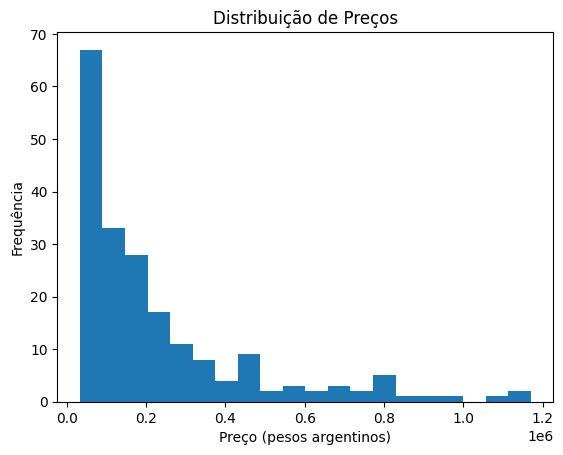

In [17]:
import matplotlib.pyplot as plt

plt.hist(dados['price'], bins=20)
plt.title('Distribuição de Preços')
plt.xlabel('Preço (pesos argentinos)')
plt.ylabel('Frequência')
plt.show()
